**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing & Data Cleaning
- Checking for duplicates, missing values, outliers, irrelevant columns


In [2]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe(include='number')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df['waterfront'] = pd.Categorical(df['waterfront'])

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  category      
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [8]:
columns = ['day', 'month', 'zipcode', 'lat', 'long', 'year', 'id']
for col in columns:
    print('Column: ', col)
    print("Unique values: ", df[col].unique())
    print("Number of unique values: ", df[col].nunique())
    print("_"*100)


Column:  day
Unique values:  ['Monday' 'Tuesday' 'Wednesday' 'Friday' 'Thursday' 'Saturday' 'Sunday']
Number of unique values:  7
____________________________________________________________________________________________________
Column:  month
Unique values:  ['October' 'December' 'February' 'May' 'June' 'January' 'April' 'March'
 'July' 'August' 'November' 'September']
Number of unique values:  12
____________________________________________________________________________________________________
Column:  zipcode
Unique values:  [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]
Number of unique values:  70
______

# Irrelevant Columns 
Given the large amount of unique values in the zipcode, id, lat, and long categories, it is unlikely that they provide any valuable information towards the price of the house, and will likely only serve to add noise. Therefore, we will drop these columns. The date column will also be dropped since all relevant information is kept in the day, month, and year column.

In [9]:
new_df = df.drop(columns=['zipcode', 'id', 'date', 'lat', 'long'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21613 non-null  float64 
 1   bedrooms       21613 non-null  int64   
 2   bathrooms      21613 non-null  float64 
 3   sqft_living    21613 non-null  int64   
 4   sqft_lot       21613 non-null  int64   
 5   floors         21613 non-null  float64 
 6   waterfront     21613 non-null  category
 7   view           21613 non-null  int64   
 8   condition      21613 non-null  int64   
 9   grade          21613 non-null  int64   
 10  sqft_above     21613 non-null  int64   
 11  sqft_basement  21613 non-null  int64   
 12  yr_built       21613 non-null  int64   
 13  yr_renovated   21613 non-null  int64   
 14  sqft_living15  21613 non-null  int64   
 15  sqft_lot15     21613 non-null  int64   
 16  day            21613 non-null  object  
 17  month          21613 non-null  

In [10]:
cat_col = ['month', 'day', 'waterfront']
num_col = new_df.columns.difference(cat_col)
num_col

Index(['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'price',
       'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15',
       'sqft_lot', 'sqft_lot15', 'view', 'year', 'yr_built', 'yr_renovated'],
      dtype='object')

# Detecting Outliers - Price

In [11]:
new_df['price'].max()

7700000.0

In [12]:
new_df['price'].min()

75000.0

In [13]:
new_df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


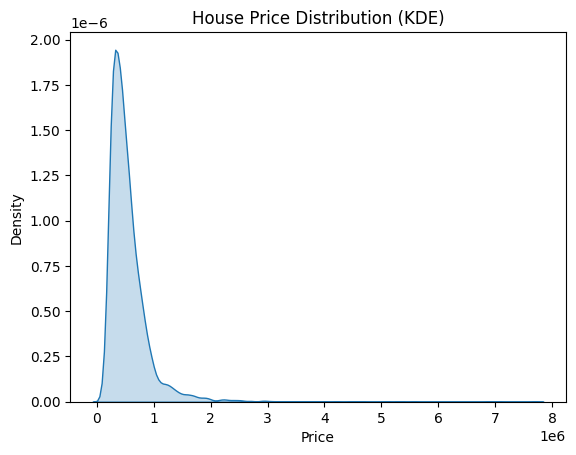

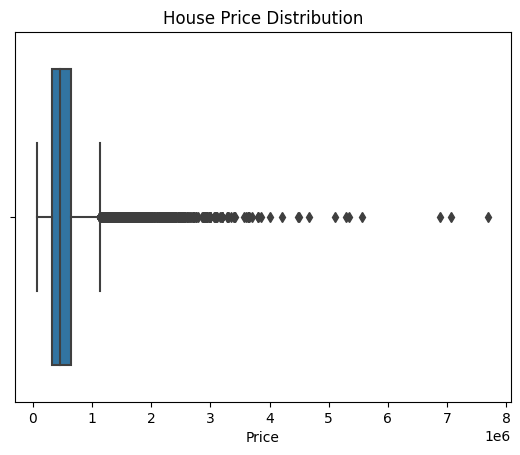

In [14]:

sns.kdeplot(new_df['price'], fill=True)  
plt.title("House Price Distribution (KDE)")

plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

sns.boxplot(x=new_df['price'])
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.show()

In [15]:
new_df = new_df[(new_df['price']<6000000)]

# Sqft_living

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


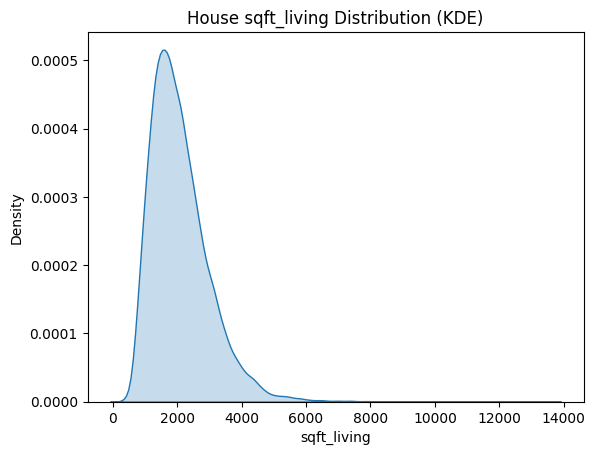

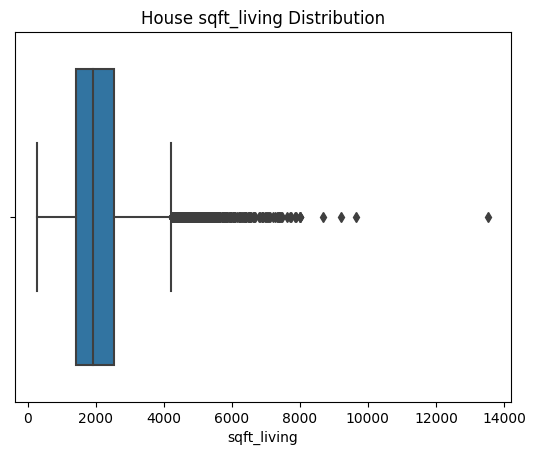

In [16]:

sns.kdeplot(new_df['sqft_living'], fill=True) 
plt.title("House sqft_living Distribution (KDE)")
plt.xlabel("sqft_living")
plt.ylabel("Density")
plt.show()

sns.boxplot(x=new_df['sqft_living'])
plt.title("House sqft_living Distribution")
plt.xlabel("sqft_living")
plt.show()

In [17]:
new_df['sqft_living'].describe()

count    21610.000000
mean      2078.708607
std        912.849523
min        290.000000
25%       1425.500000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [18]:
new_df[new_df['sqft_living']>10000].count()

price            1
bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
grade            1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
sqft_living15    1
sqft_lot15       1
day              1
month            1
year             1
dtype: int64

In [19]:
new_df = new_df[~(new_df['sqft_living'] > 10000)]

In [20]:
new_df[new_df['sqft_living'] < 500].count()

price            17
bedrooms         17
bathrooms        17
sqft_living      17
sqft_lot         17
floors           17
waterfront       17
view             17
condition        17
grade            17
sqft_above       17
sqft_basement    17
yr_built         17
yr_renovated     17
sqft_living15    17
sqft_lot15       17
day              17
month            17
year             17
dtype: int64

In [21]:
new_df[new_df['sqft_living']==new_df['sqft_living'].min()].shape


(1, 19)

In [22]:
new_df=new_df[new_df['sqft_living'] != new_df['sqft_living'].min()]

# Sqft_lot

In [23]:
new_df['sqft_lot'].describe()

count    2.160800e+04
mean     1.509080e+04
std      4.137690e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.617000e+03
75%      1.068250e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


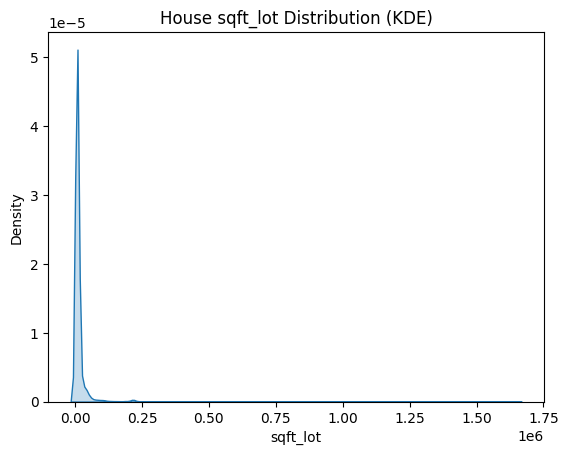

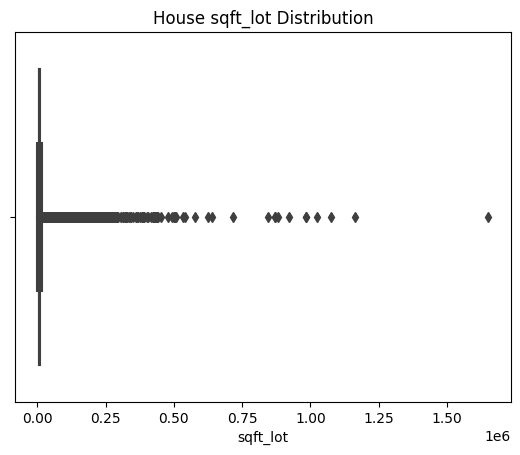

In [24]:
sns.kdeplot(new_df['sqft_lot'], fill=True) 
plt.title("House sqft_lot Distribution (KDE)")
plt.xlabel("sqft_lot")
plt.ylabel("Density")
plt.show()

sns.boxplot(x=new_df['sqft_lot'])
plt.title("House sqft_lot Distribution")
plt.xlabel("sqft_lot")
plt.show()

In [25]:
new_df[new_df['sqft_lot'] > 1250000].count()

price            1
bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
grade            1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
sqft_living15    1
sqft_lot15       1
day              1
month            1
year             1
dtype: int64

In [26]:
new_df['sqft_lot']=np.log(new_df['sqft_lot'])


# Sqft_above

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


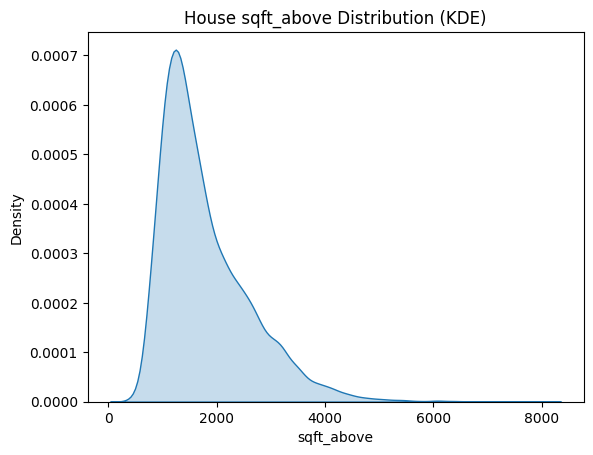

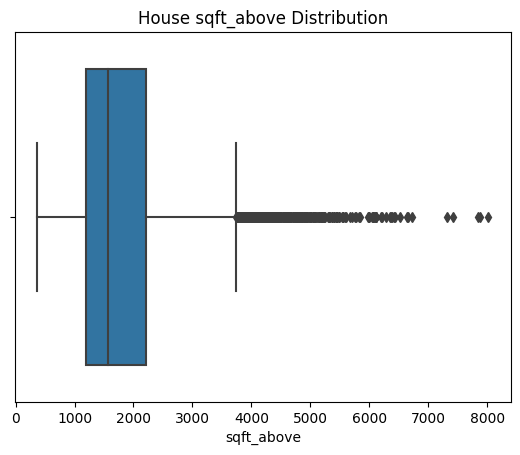

In [27]:
sns.kdeplot(new_df['sqft_above'], fill=True) 
plt.title("House sqft_above Distribution (KDE)")
plt.xlabel("sqft_above")
plt.ylabel("Density")
plt.show()

sns.boxplot(x=new_df['sqft_above'])
plt.title("House sqft_above Distribution")
plt.xlabel("sqft_above")
plt.show()

# Sqft_living 15

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


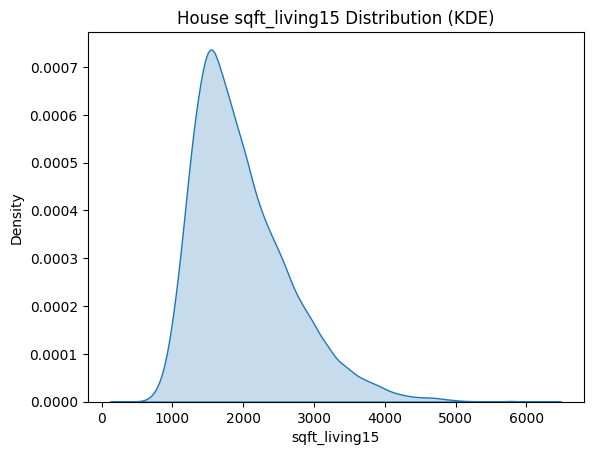

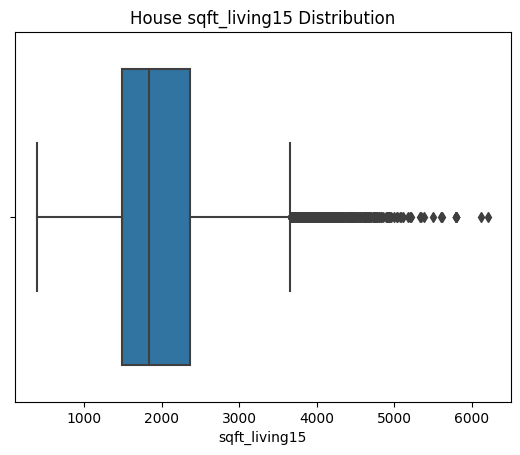

In [28]:
sns.kdeplot(new_df['sqft_living15'], fill=True)  
plt.title("House sqft_living15 Distribution (KDE)")
plt.xlabel("sqft_living15")
plt.ylabel("Density")
plt.show()

sns.boxplot(x=new_df['sqft_living15'])
plt.title("House sqft_living15 Distribution")
plt.xlabel("sqft_living15")
plt.show()

# Sqft_living & Sqft_living15
Was not sure about the correlation between sqft_living and sqft_living15. Goal is to first check for correlation to prevent overlap, then to check the necessity of both the sqft_living15 & sqft_lot15 categories.

In [29]:
corr = new_df['sqft_living'].corr(new_df['sqft_living15'])
print("Correlation:", corr)

Correlation: 0.7582442893964317


In [30]:
corr = new_df['sqft_lot'].corr(new_df['sqft_lot15'])
print("Correlation:", corr)

Correlation: 0.6235364259466976


The correlation between the categories was not significantly high enough to justify deleting them (<0.85), but they should still be investigated. 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


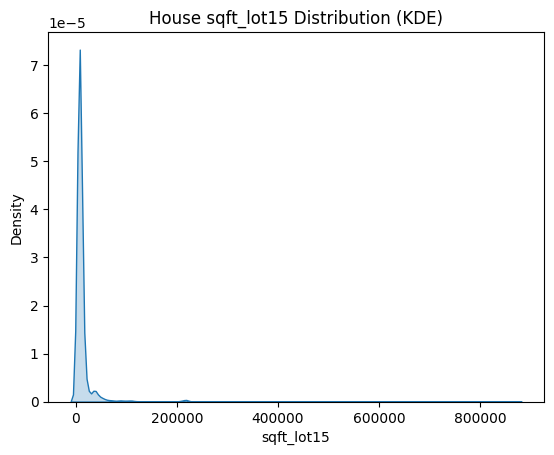

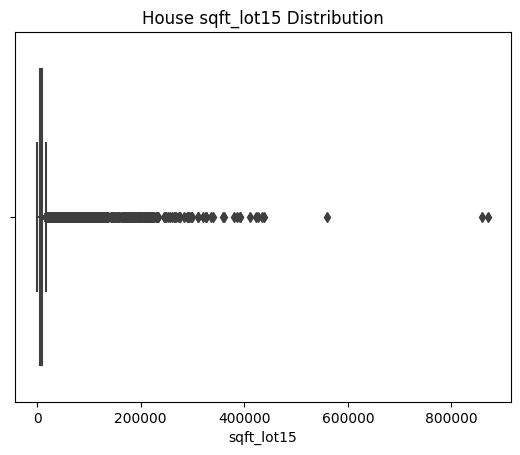

In [31]:
sns.kdeplot(new_df['sqft_lot15'], fill=True) 
plt.title("House sqft_lot15 Distribution (KDE)")
plt.xlabel("sqft_lot15")
plt.ylabel("Density")
plt.show()

sns.boxplot(x=new_df['sqft_lot15'])
plt.title("House sqft_lot15 Distribution")
plt.xlabel("sqft_lot15")
plt.show()

# Checking importance of sqft_living15 & sqft_lot15
Training a simple model to detect the importance of these features, to fully justify keeping them. The other columns included are bedrooms and bathrooms, since it is commonly found that they are strongly correlated with house price. 

In [32]:
from sklearn.ensemble import RandomForestRegressor

X = new_df[['sqft_living', 'sqft_living15', 'bedrooms', 'bathrooms']]
y = new_df['price']


model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X, y)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)



         Feature  Importance
0    sqft_living    0.679084
1  sqft_living15    0.203898
3      bathrooms    0.076308
2       bedrooms    0.040710


In [33]:
from sklearn.ensemble import RandomForestRegressor

X = new_df[['sqft_lot', 'sqft_lot15', 'bedrooms', 'bathrooms']]
y = new_df['price']


model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X, y)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)


      Feature  Importance
3   bathrooms    0.368956
1  sqft_lot15    0.307396
0    sqft_lot    0.276477
2    bedrooms    0.047171


# Trial Conclusion
It seems that sqft_living15 has a higher importance rating than the bedrooms and bathrooms columns, while the sqft_lot15 had a higher importance than sqft_lot and bedrooms. This is sufficient reason to include them in the dataframe to train the model.

# Bedrooms

In [34]:
new_df = new_df[(new_df['bedrooms'] < 8) & (new_df['bedrooms'] != 0)]

In [35]:
new_df['bedrooms'].value_counts()


bedrooms
3    9824
4    6882
2    2760
5    1600
6     270
1     199
7      37
Name: count, dtype: int64

# Bathrooms

In [36]:
new_df['bathrooms'].value_counts()

bathrooms
2.50    5376
1.00    3851
1.75    3047
2.25    2047
2.00    1929
1.50    1445
2.75    1182
3.00     747
3.50     730
3.25     588
3.75     154
4.00     133
4.50      97
4.25      79
0.75      71
4.75      23
5.00      20
5.25      12
5.50      10
1.25       9
6.00       5
0.50       4
5.75       4
0.00       3
6.75       2
6.25       2
6.50       2
Name: count, dtype: int64

**Values hard to work with, can cause noise.**
It can be useful to round to the nearest .5, since there isn't much distinction between .25,.5,and .75 bathrooms.

In [37]:
import math
new_df['bathrooms'] = [math.floor(x*2)/2 for x in new_df['bathrooms']]
new_df['bathrooms'].value_counts()

bathrooms
2.5    6558
1.5    4492
2.0    3976
1.0    3860
3.0    1335
3.5     884
4.0     212
4.5     120
0.5      75
5.0      32
5.5      14
6.0       7
6.5       4
0.0       3
Name: count, dtype: int64

In [38]:
new_df = new_df[(new_df['bathrooms'] > 0) & (new_df['bathrooms'] < 6)] 


# Floors

In [39]:
new_df['floors'].value_counts()

floors
1.0    10665
2.0     8210
1.5     1909
3.0      610
2.5      158
3.5        6
Name: count, dtype: int64

**Half floors should be removed**

In [40]:
new_df['floors'] = new_df['floors'].astype(int)
new_df['floors'].value_counts()

floors
1    12574
2     8368
3      616
Name: count, dtype: int64

# View

In [41]:
new_df['view'].value_counts()
new_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'day', 'month', 'year'],
      dtype='object')

# Rest of columns

In [42]:
check_cols = ['waterfront', 'view', 'condition' , 'grade', 'day', 'month', 'year']
for col in check_cols:
    print(new_df[col].value_counts())
    print('-'*100)

waterfront
0    21398
1      160
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
view
0    19448
2      958
3      507
1      332
4      313
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
condition
3    13991
4     5670
5     1698
2      170
1       29
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
grade
7     8960
8     6060
9     2613
6     2038
10    1133
11     394
5      242
12      80
4       27
13      10
3        1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
day
Tuesday      4704
Wednesday    4591
Monday       4091
Thursday     3980
Friday       3677
Saturday      285
Sunday        230
Name: count, dtype: int64
---------------------------------------------------

In [43]:
new_df = new_df[new_df['grade'] > 3]

# Building Age

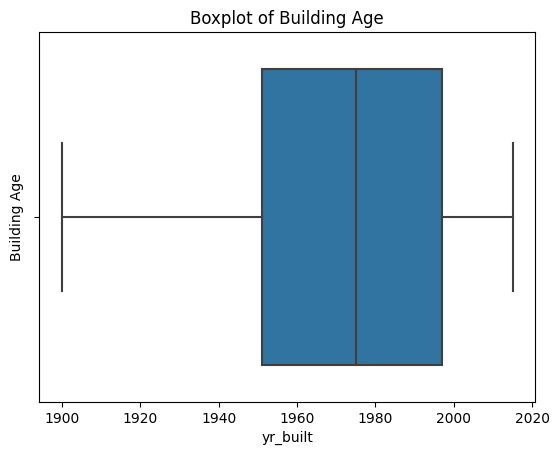

In [44]:
sns.boxplot(x=new_df['yr_built'])
plt.title('Boxplot of Building Age')
plt.ylabel('Building Age')
plt.show()

# Year Renovated

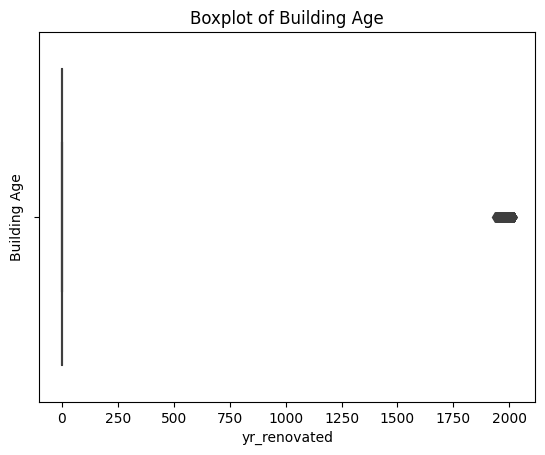

In [45]:
sns.boxplot(x=new_df['yr_renovated'])
plt.title('Boxplot of Building Age')
plt.ylabel('Building Age')
plt.show()

# Outliers in Renovated Column
There are many entries with 0 as the year renovated. It is assumed that this means they were not renovated. This can mislead the model, which is why it is wise to create a new column containing the age since it was built/renovated, and a binary column that denotes whether the building was renovated to not lose this piece of information.

In [46]:
new_df['is_renovated'] = new_df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
new_df['age'] = new_df['yr_renovated'].where(new_df['yr_renovated']!=0,new_df['yr_built'])
new_df['age'] = new_df['year'] - new_df['age']

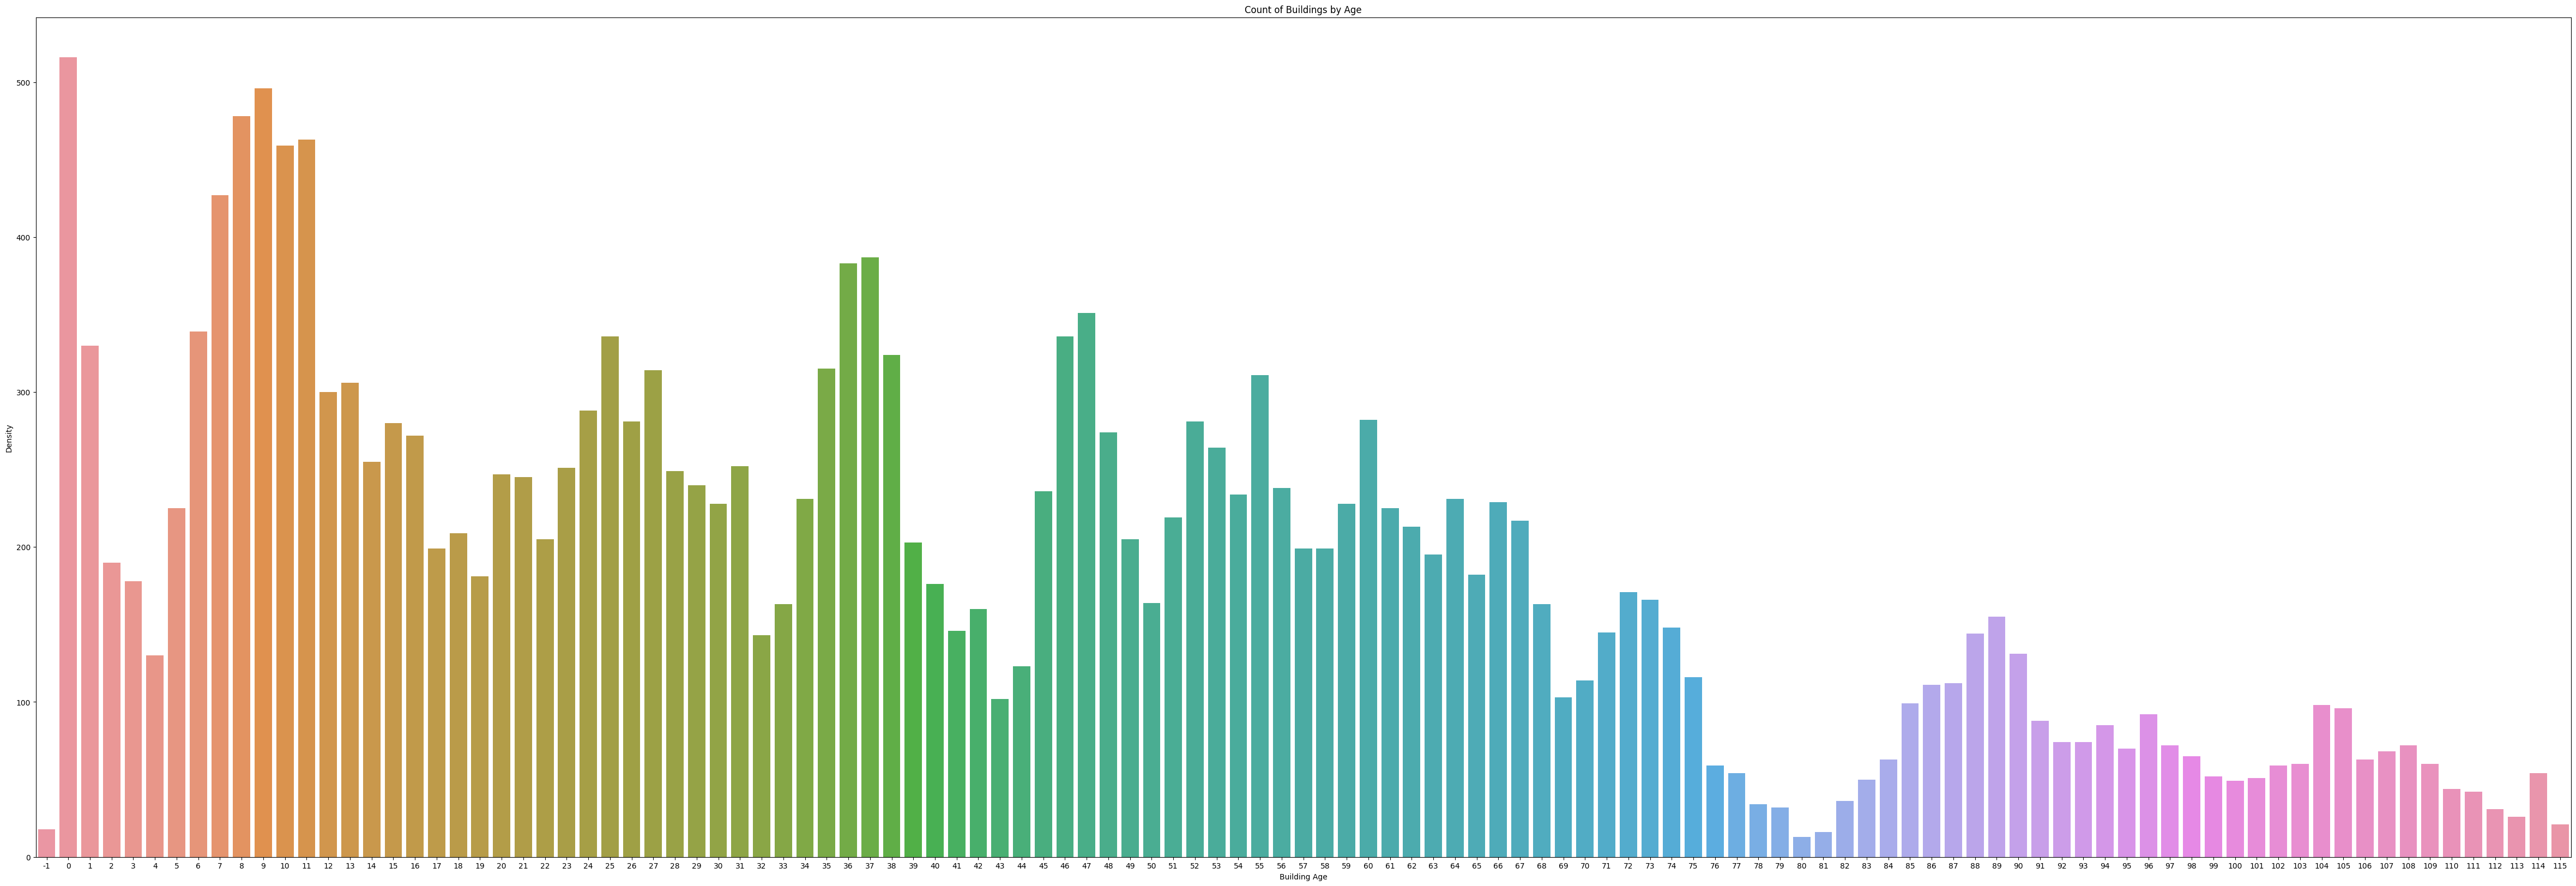

In [47]:
plt.figure(figsize=(60,20))
sns.countplot(x='age', data=new_df)
plt.title('Count of Buildings by Age')
plt.xlabel('Building Age')
plt.ylabel('Density')
plt.show()

# Checking strong correlations for price

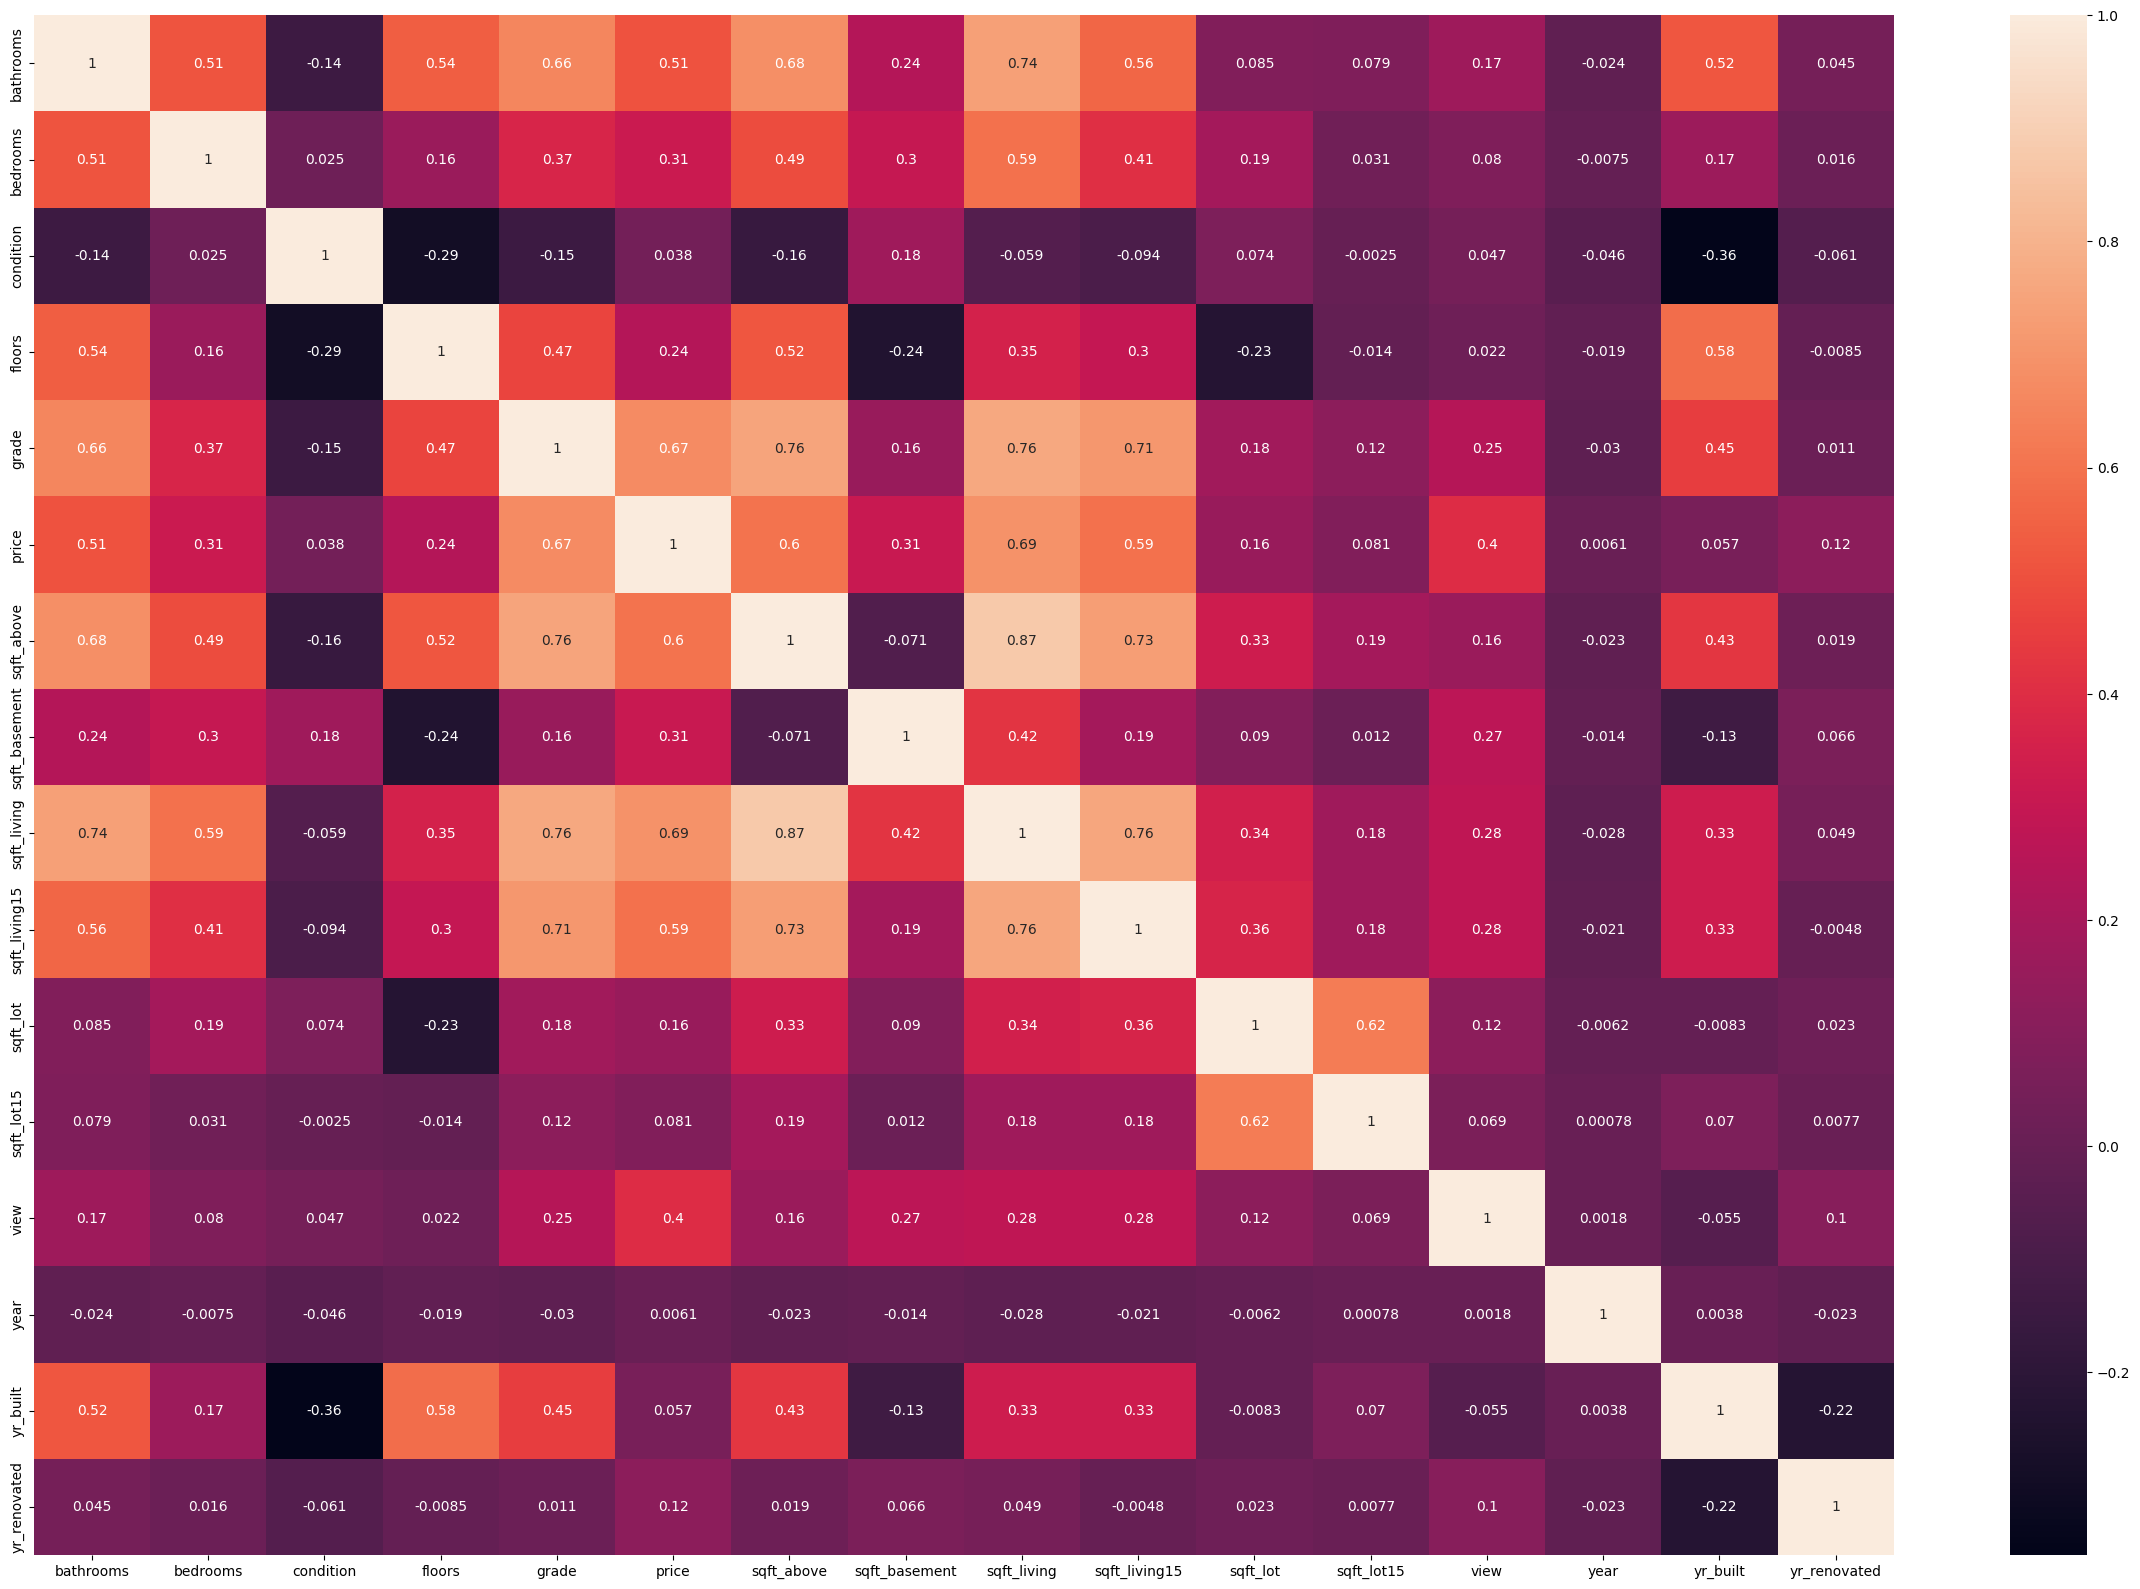

In [48]:
plt.figure(figsize=(30,20))
corr = new_df[num_col].corr()
sns.heatmap(corr, annot=True)
plt.show()

# Removing remainder of outliers
If an entry has a z score > 3, it is considered an outlier and should be removed.

In [49]:
from scipy import stats
for col in num_col:
    z = np.abs(stats.zscore(new_df[col]))
    new_data = new_df[z<3]
new_data.shape

(20649, 21)

**The new dataframe does not experience a significant loss of data. Therefore, it is safe to use this method.**

In [50]:
new_df.info()
cat_col

<class 'pandas.core.frame.DataFrame'>
Index: 21557 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21557 non-null  float64 
 1   bedrooms       21557 non-null  int64   
 2   bathrooms      21557 non-null  float64 
 3   sqft_living    21557 non-null  int64   
 4   sqft_lot       21557 non-null  float64 
 5   floors         21557 non-null  int64   
 6   waterfront     21557 non-null  category
 7   view           21557 non-null  int64   
 8   condition      21557 non-null  int64   
 9   grade          21557 non-null  int64   
 10  sqft_above     21557 non-null  int64   
 11  sqft_basement  21557 non-null  int64   
 12  yr_built       21557 non-null  int64   
 13  yr_renovated   21557 non-null  int64   
 14  sqft_living15  21557 non-null  int64   
 15  sqft_lot15     21557 non-null  int64   
 16  day            21557 non-null  object  
 17  month          21557 non-null  objec

['month', 'day', 'waterfront']

# Day of the Week

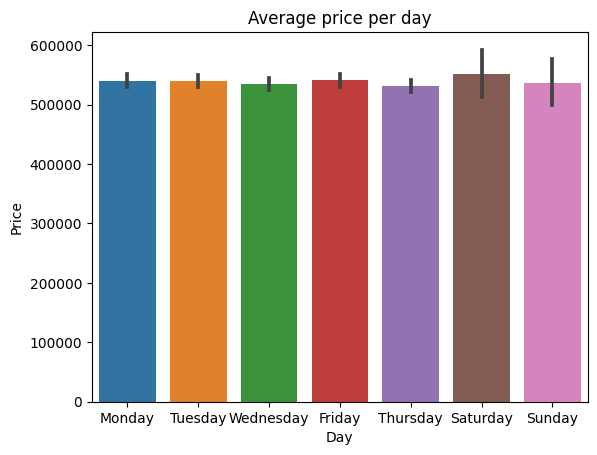

In [51]:
sns.barplot(x='day', y = 'price', data=new_df)
plt.title("Average price per day")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

# Observation
Every day has roughly the same average price, other than Saturday, which seems to be slightly higher. This may just be a coincidence, but we must investigate it.

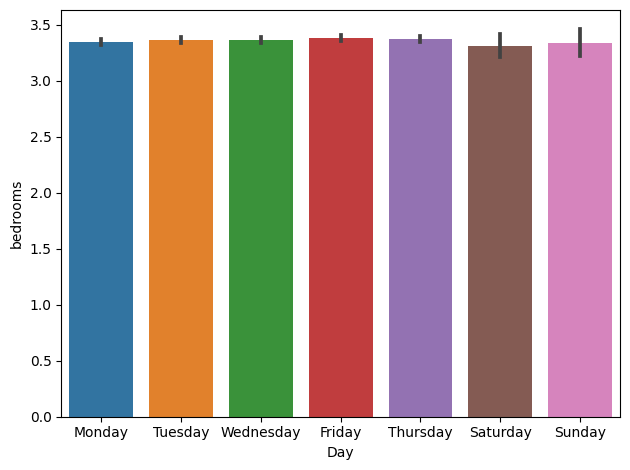

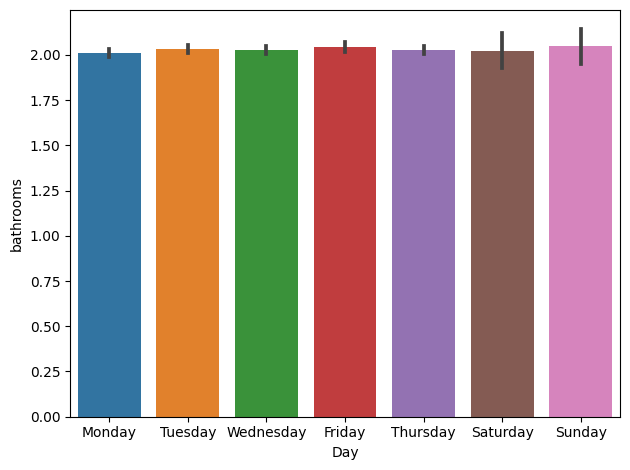

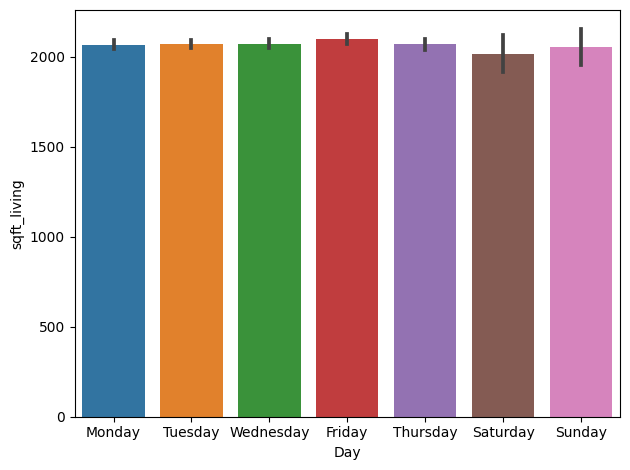

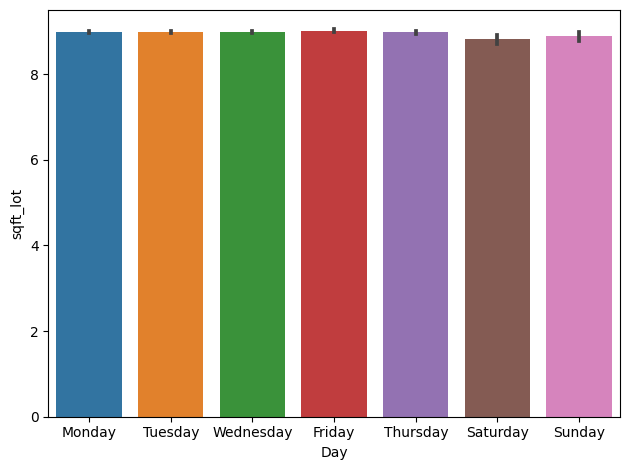

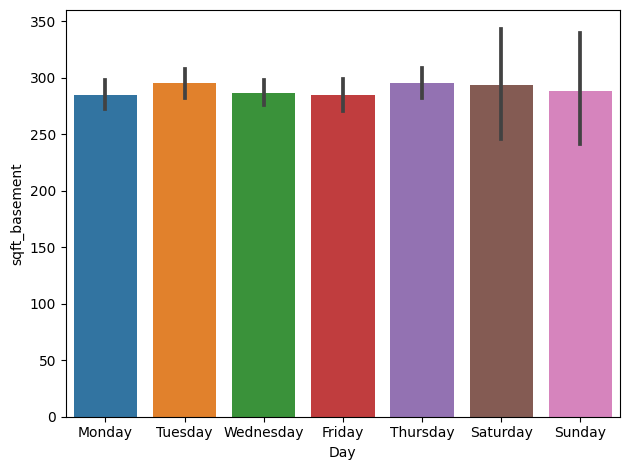

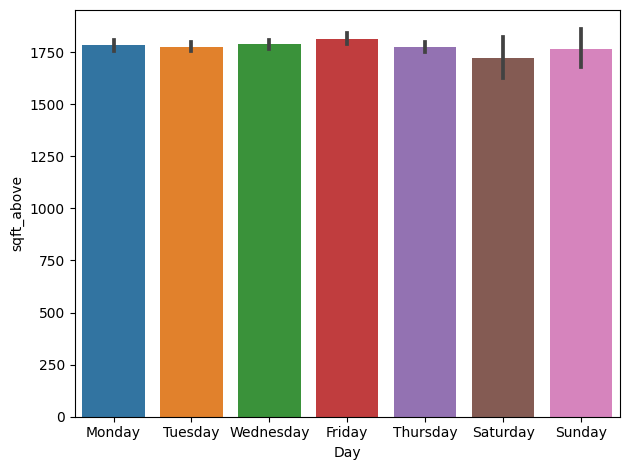

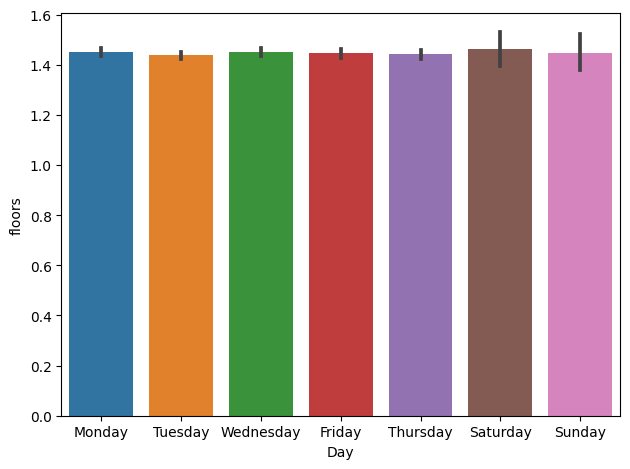

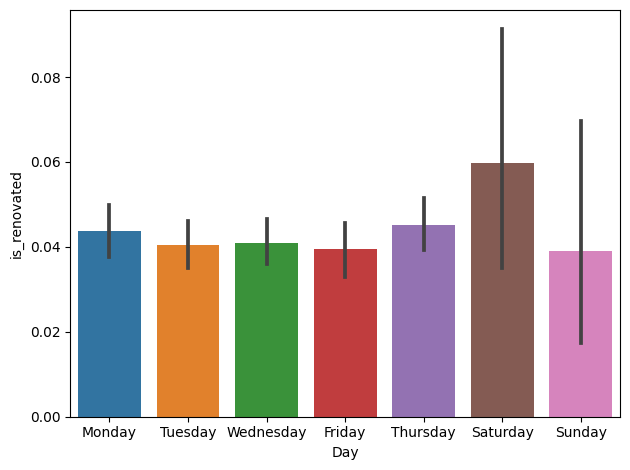

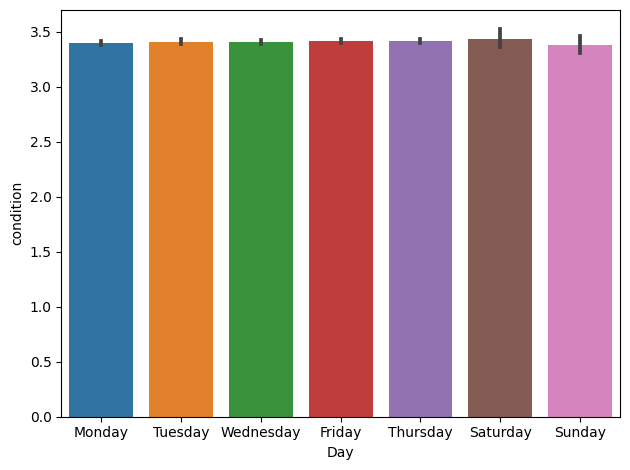

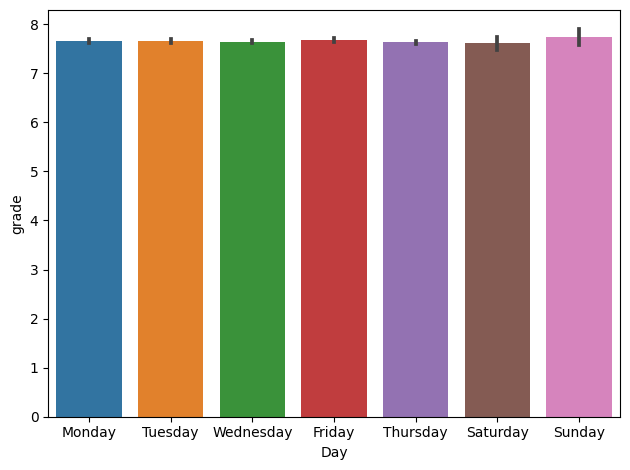

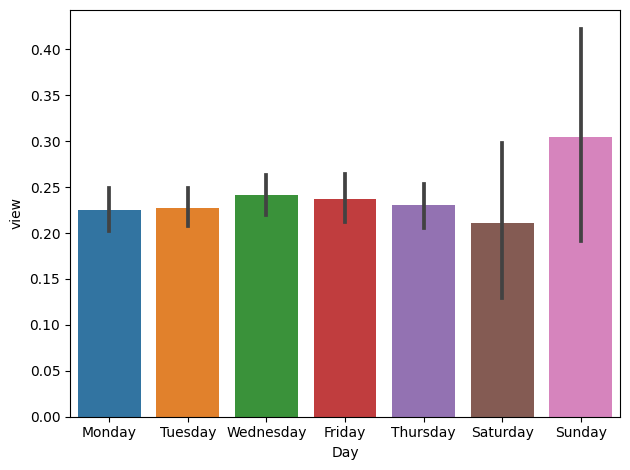

In [52]:
test_cols = ["bedrooms", 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_above', 'floors', 'is_renovated', 'condition', 'grade', 'view']

for col in test_cols:
    sns.barplot(x='day', y=col, data = new_df)
    plt.xlabel('Day')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Day-price Disparity:
We can conclude that the disparity in price is likely due to renovation status, where homes that were sold on Saturday were renovated much more on average, which would increase the price. It is unlikely that the day on which a house is sold will influence its price. Therefore, it is safe to drop this column.

# Month

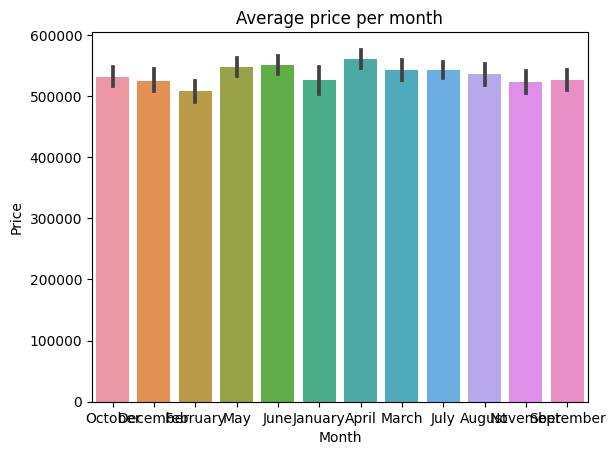

In [53]:
sns.barplot(x='month', y = 'price', data=new_df)
plt.title("Average price per month")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

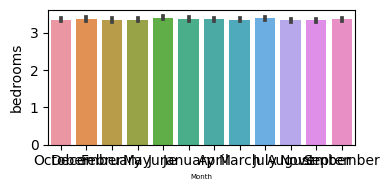

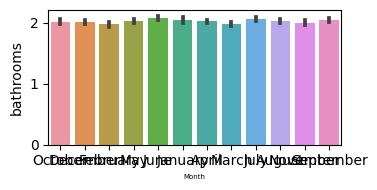

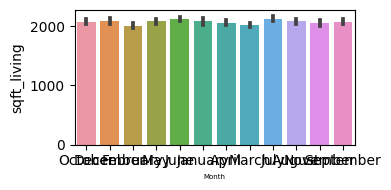

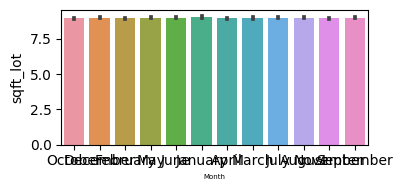

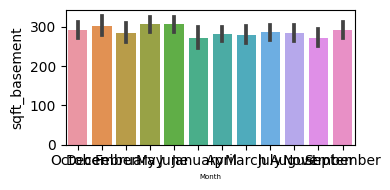

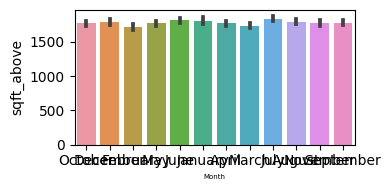

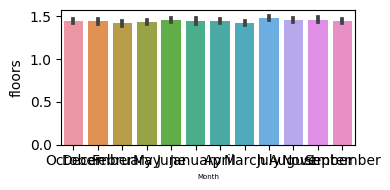

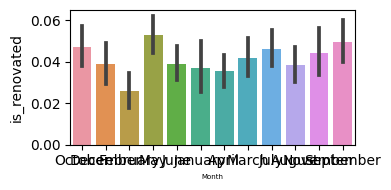

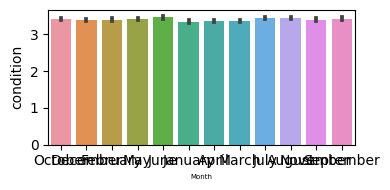

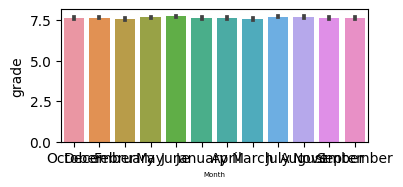

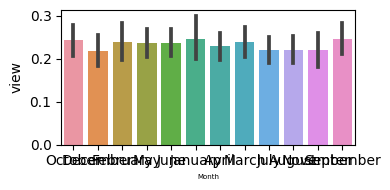

In [54]:
test_cols = ["bedrooms", 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_above', 'floors', 'is_renovated', 'condition', 'grade', 'view']
for col in test_cols:
    plt.figure(figsize=(4,2))
    sns.barplot(x='month', y=col, data = new_df)
    plt.xlabel('Month', fontsize=5)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


There is significant enough variation in price to justify keeping the column.

In [55]:
new_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'day', 'month', 'year', 'is_renovated', 'age'],
      dtype='object')

# Observation
I started wondering what the point of the sqft_above, sqft_basement, and sqft_living columns were. I then quickly realized that the sqft_living describes the area of the house itself, which is the same as the area of the basement and the area of the aboveground added together. 

In [56]:
new_df['sqft_total'] = new_df["sqft_above"] + new_df['sqft_basement']
new_df[new_df['sqft_total'] != new_df['sqft_living']].count()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
day              0
month            0
year             0
is_renovated     0
age              0
sqft_total       0
dtype: int64

The check shows that in each entry, this is the case. These columns can thus be removed to prevent repetitive data. 

# Feature Engineering

In [57]:
new_df['basement_ratio'] = new_df['sqft_basement']/new_df['sqft_living']

new_df['sqft_per_room'] = new_df['sqft_living']/(new_df['bedrooms'] + new_df['bathrooms'])

new_df['recently_renovated'] = ((new_df['yr_renovated'] != 0) & ((new_df['year'] - new_df['yr_renovated']) <= 10)).astype(int)
new_df['recently_renovated'] = pd.Categorical(new_df['recently_renovated'])
new_df = new_df.drop(columns=['day','yr_renovated', 'sqft_basement', 'sqft_above'])

In [58]:
new_df['year'] = pd.Categorical(new_df['year'])
cat_cols = new_df[['month', 'waterfront', 'year', 'recently_renovated']].columns
num_cols = new_df.drop(columns=['month','waterfront', 'year', 'recently_renovated', 'price']).columns
cat_cols2 = df[['date']]
num_cols2 = df.drop(columns=['date'])
new_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'month', 'year', 'is_renovated', 'age', 'sqft_total',
       'basement_ratio', 'sqft_per_room', 'recently_renovated'],
      dtype='object')

In [59]:
new_df.isnull().sum()

price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
yr_built              0
sqft_living15         0
sqft_lot15            0
month                 0
year                  0
is_renovated          0
age                   0
sqft_total            0
basement_ratio        0
sqft_per_room         0
recently_renovated    0
dtype: int64

# Creating the model


In [60]:
from sklearn.model_selection import train_test_split
X = new_df.drop(columns=['price'])
y = new_df['price']
X2 = df.drop(columns=['price'])
y2 = df['price']
X_train, X_dev, y_train, y_dev = train_test_split(X,y,test_size = 0.2, random_state =42)
X_train2, X_dev2, y_train2, y_dev2 = train_test_split(X2,y2,test_size = 0.2, random_state =42)


In [61]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

scaler = StandardScaler()
encoder = OneHotEncoder()

columnTransformer = ColumnTransformer(transformers=[
    ("standardscaler", scaler, num_cols),
    ("onehotencoder", encoder, cat_cols)
])

columnTransformer2 = ColumnTransformer(transformers=[
    ("standardscaler", scaler, num_cols2),
    ("onehotencoder", encoder, cat_cols2)
])






In [62]:
models = {
    'randomForest': RandomForestRegressor(),
    'Linear' : LinearRegression(),
    'GradientBooster' : GradientBoostingRegressor(),
    'AdaBooster' : AdaBoostRegressor(),
    'DecisionTree' : DecisionTreeRegressor(),
    'SVR' : SVR(),
    'KNeighbor' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor()
}

**Pipelines**
Creating a dictionary of pipelines for each model would allow independently running the fitting and cross validation steps, decreasing iteration time. First, the u

In [63]:
pipelines = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("column_transformer", columnTransformer),
        ('model', model)
    ])
    pipelines[name] = pipe

pipelines2 = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("column_transformer", columnTransformer),
        ('model', model)
    ])
    pipelines2[name] = pipe



In [64]:
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)

for name, pipe in pipelines2.items():
    pipe.fit(X_train2, y_train2)

ValueError: A given column is not a column of the dataframe

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
for name, pipe in pipelines.items():
    y_pred = pipe.predict(X_dev)
    r2 = r2_score(y_dev, y_pred)
    rmse = mean_squared_error(y_dev, y_pred, squared = False)
    cvscore = cross_val_score(pipe, X, y, cv=3)
    print("Model: ", name)
    print("R^2 score: ", r2)
    print("CVscore: ", cvscore.mean())
    print("RMSE:", rmse)
    print("-"*100)

print("Uncleaned data scores:")
print("-"*100)

for name, pipe in pipelines.items():
    y_pred = pipe.predict(X_dev)
    r2 = r2_score(y_dev, y_pred)
    rmse = mean_squared_error(y_dev, y_pred, squared = False)
    cvscore = cross_val_score(pipe, X, y, cv=3)
    print("Model: ", name)
    print("R^2 score: ", r2)
    print("CVscore: ", cvscore.mean())
    print("RMSE:", rmse)
    print("-"*100)

**Scores**
The scores are already pretty good, but they can be better. The best models seem to be random forest, gradient booster, and xgboost. We will use optuna to tune their hyperparameters.

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression



def objective (trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 3),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'max_features': trial.suggest_float('max_features', 0.3, 1),
        'random_state': 42,
    }
    model1 = RandomForestRegressor(**params)
    pipeline = Pipeline(steps=[
        ('columnTransformer', columnTransformer), 
        ('model', model1)
    ])
    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error').mean()    
    return np.mean(score)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs = -1)
print("Best params:", study.best_params)

In [ ]:
import optuna
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression



def objective (trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'max_features': trial.suggest_float('max_features', 0.3, 1),
        'random_state': 42,
    }
    model2 = GradientBoostingRegressor(**params)
    pipeline = Pipeline(steps=[
        ('columnTransformer', columnTransformer), 
        ('model', model2)
    ])
    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error').mean()    
    return np.mean(score)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best params:", study.best_params)

In [ ]:
import optuna
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression



def objective (trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42,
        'enable_categorical': True,
        "tree_method": "hist",
        "n_jobs": -1
    }
    model3 = XGBRegressor(**params)
    pipeline = Pipeline(steps=[
        ('columnTransformer', columnTransformer), 
        ('model', model3)
    ])
    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error').mean()    
    return np.mean(score)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best params:", study.best_params)

In [ ]:
randomforest = RandomForestRegressor(max_depth = 8, n_estimators = 281, min_samples_leaf = 3, min_samples_split = 3, max_features = 0.5012751303353932, random_state=42)
pipeline = Pipeline(steps=[
    ('columnTransformer', columnTransformer), 
    ('model', randomforest)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_dev)
r2 = r2_score(y_dev, y_pred)
cvscore = cross_val_score(pipeline, X, y, cv=5)
print("Cvscore: ", cvscore.mean())
print("R^2 score: ", r2)

In [ ]:
gradientbooster = GradientBoostingRegressor(max_depth = 4, n_estimators = 298, subsample = 0.8295765763521072, min_samples_leaf = 3, min_samples_split = 3, max_features = 0.5402918486568448, random_state = 42)
pipeline = Pipeline(steps=[
    ('columnTransformer', columnTransformer), 
    ('model', gradientbooster)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_dev)
r2 = r2_score(y_dev, y_pred)
cvscore = cross_val_score(pipeline, X, y, cv=5)
print("Cvscore: ", cvscore.mean())
print("R^2 score: ", r2)

In [ ]:
XGB = XGBRegressor(max_depth = 7, learning_rate = 0.025643326039814653, n_estimators = 578, min_child_weight = 3, subsample = 0.8285099111251093, colsample_bytree = 0.698548700056679, enable_categorical=True)
pipeline = Pipeline(steps=[
    ('columnTransformer', columnTransformer), 
    ('model', XGB)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_dev)
r2 = r2_score(y_dev, y_pred)
cvscore = cross_val_score(pipeline, X, y, cv=5)
print("Cvscore: ", cvscore.mean())
print("R^2 score: ", r2)

# Conclusion
XGBRegressor seemed to have benefited the most from hyperparameter tuning. It is overall the best model out of the ones that were explored, with an R^2 score of nearly 0.8.